<a href="https://colab.research.google.com/github/AshishMoundekar/ML-models.projects/blob/main/Movie_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##*Create a machine learning model that can predict the genre of a movie based on its plot summary or other textual information. You can use techniques like TF-IDF or word embeddings with classifiers such as Naive Bayes, Logistic Regression, or Support Vector Machines.* ##

Let's mount our Google Drive for Datasets

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


**Phase 1:- Data Preparation**

---
1. Collection & Exploration
2. Cleaning
3. Text Perprocessing

**Step 1:- Data Collection, Exploration and Visualization**

---

**Training Data**

In [ ]:
# Training data
import pandas as pd

tr_data = pd.read_csv('/content/drive/MyDrive/Datasets/Movie_traindata.txt', sep=':::', names=["Movie","Genre","Description"])
tr_data.head(5)

<ipython-input-2-d104874191cd>:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  tr_data = pd.read_csv('/content/drive/MyDrive/Datasets/Movie_traindata.txt', sep=':::', names=["Movie","Genre","Description"])


,Movie,Genre,Description
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [ ]:
print (tr_data.isnull().sum())

Movie          0
Genre          0
Description    0
dtype: int64


In [ ]:
print(tr_data['Genre'].value_counts())

Genre
 drama           13613
 documentary     13096
 comedy           7447
 short            5073
 horror           2204
 thriller         1591
 action           1315
 western          1032
 reality-tv        884
 family            784
 adventure         775
 music             731
 romance           672
 sci-fi            647
 adult             590
 crime             505
 animation         498
 sport             432
 talk-show         391
 fantasy           323
 mystery           319
 musical           277
 biography         265
 history           243
 game-show         194
 news              181
 war               132
Name: count, dtype: int64


<ipython-input-5-44ec1042d2e3>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='viridis')


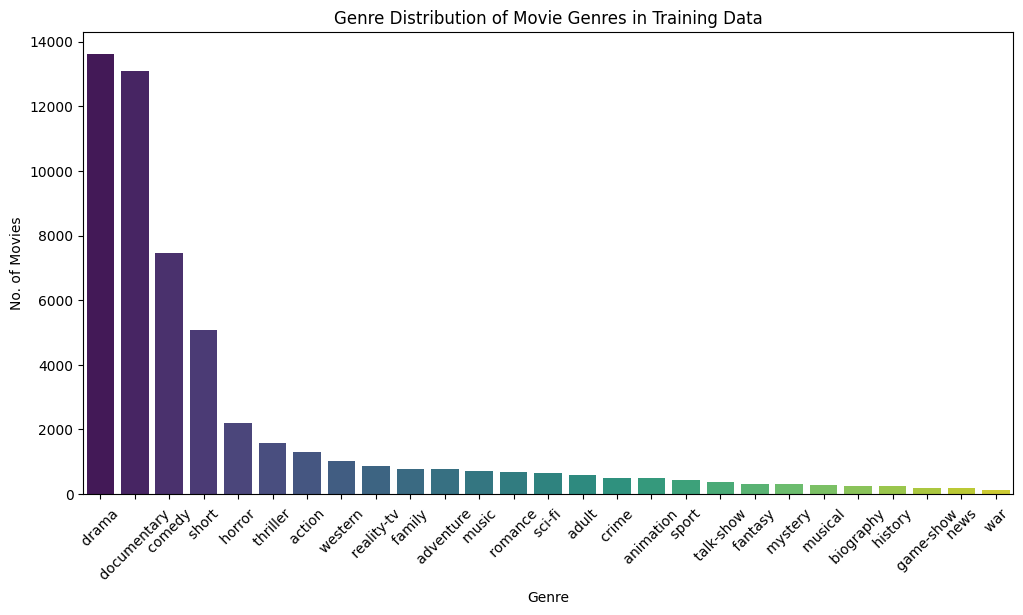

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

genre_counts = tr_data['Genre'].value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='viridis')
plt.title('Genre Distribution of Movie Genres in Training Data')
plt.xlabel('Genre')
plt.ylabel('No. of Movies')
plt.xticks(rotation=45)
plt.show()

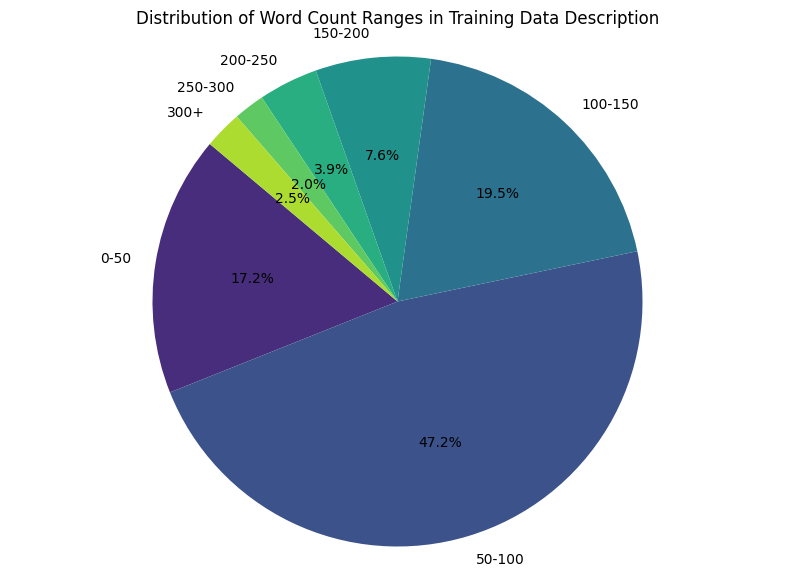

In [ ]:

tr_data['Word_count'] = tr_data['Description'].apply(lambda x: len(str(x).split()))

bins = [0, 50, 100, 150, 200, 250, 300, float('inf')]
labels = ['0-50', '50-100', '100-150', '150-200', '200-250', '250-300', '300+']

tr_data['Word_count_Range'] = pd.cut(tr_data['Word_count'], bins=bins, labels=labels, right=False)

word_count_ranges = tr_data['Word_count_Range'].value_counts().sort_index()

plt.figure(figsize=(10, 7))
plt.pie(word_count_ranges, labels=word_count_ranges.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis', len(word_count_ranges)))
plt.title('Distribution of Word Count Ranges in Training Data Description')
plt.axis('equal')
plt.show()

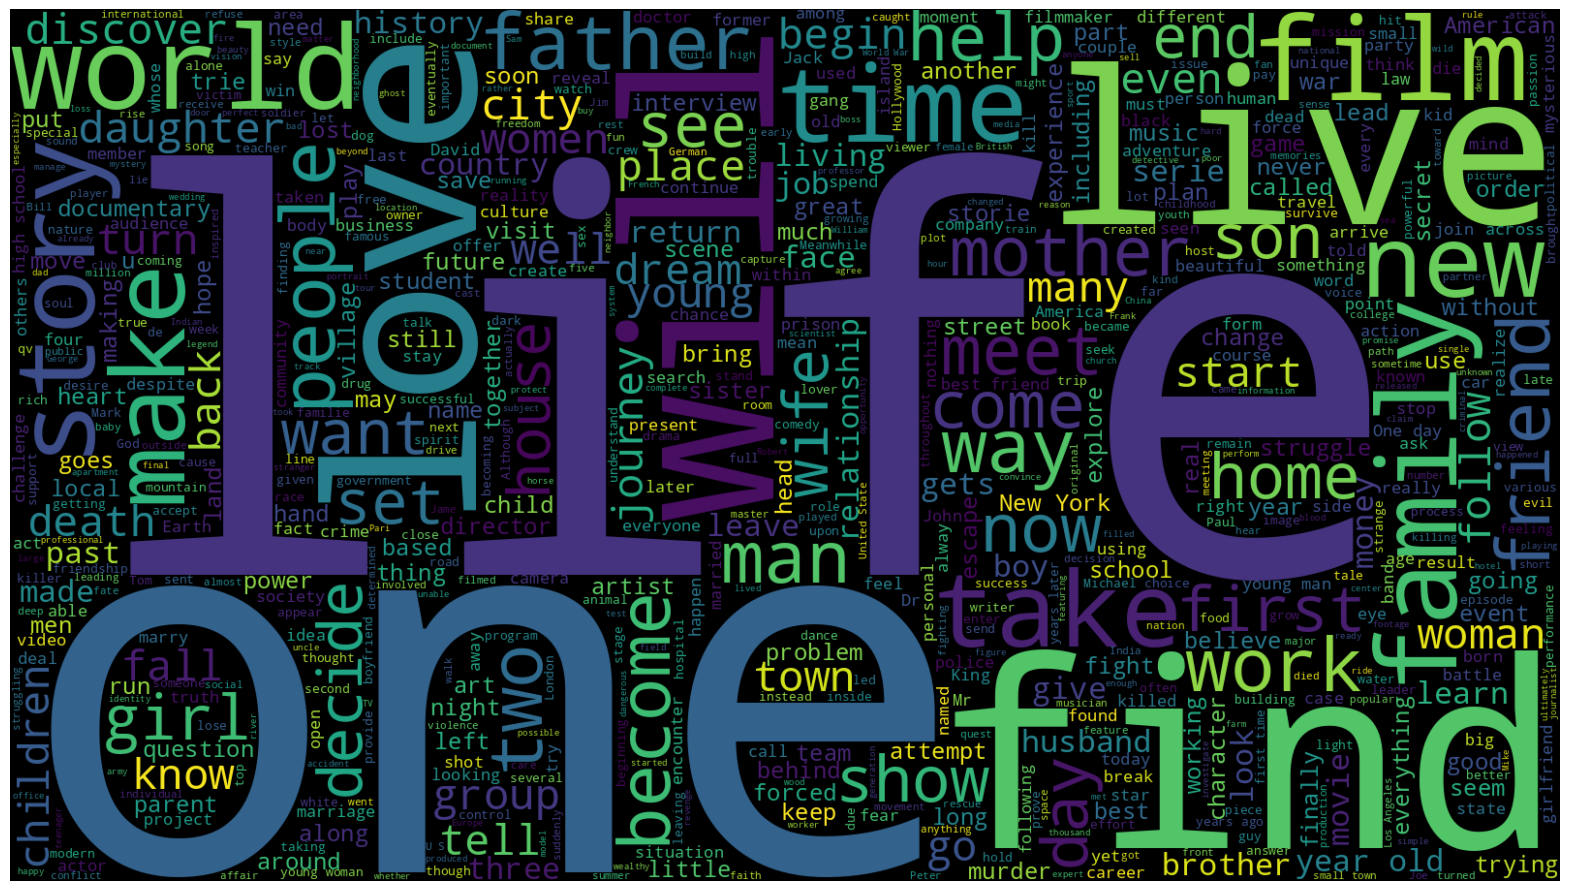

In [ ]:
from wordcloud import WordCloud

text = ' '.join(tr_data['Description'])

plt.figure(figsize = (20,20))
wc = WordCloud(max_words=700, width = 1600, height=900, colormap='viridis').generate(text)
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

**Testing Data**

In [ ]:
# Testing data
ts_data = pd.read_csv('/content/drive/MyDrive/Datasets/Movie_testdata.txt', sep=':::', names=['Movie',"Description"])
ts_data.head(5)

<ipython-input-8-6651f93aec93>:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  ts_data = pd.read_csv('/content/drive/MyDrive/Datasets/Movie_testdata.txt', sep=':::', names=['Movie',"Description"])


,Movie,Description
1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar..."
2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
5,Er nu zhai (1955),Before he was known internationally as a mart...


In [ ]:
print (ts_data.isnull().sum())

Movie          0
Description    0
dtype: int64


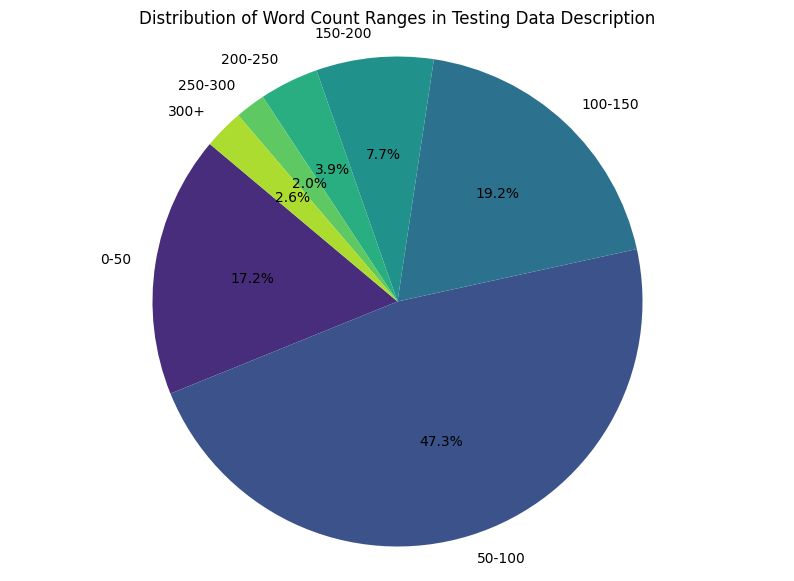

In [ ]:
ts_data['Word_count'] = ts_data['Description'].apply(lambda x: len(str(x).split()))

bins = [0, 50, 100, 150, 200, 250, 300, float('inf')]
labels = ['0-50', '50-100', '100-150', '150-200', '200-250', '250-300', '300+']

ts_data['Word_count_Range'] = pd.cut(ts_data['Word_count'], bins=bins, labels=labels, right=False)

word_count_ranges = ts_data['Word_count_Range'].value_counts().sort_index()

plt.figure(figsize=(10, 7))
plt.pie(word_count_ranges, labels=word_count_ranges.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis', len(word_count_ranges)))
plt.title('Distribution of Word Count Ranges in Testing Data Description')
plt.axis('equal')
plt.show()

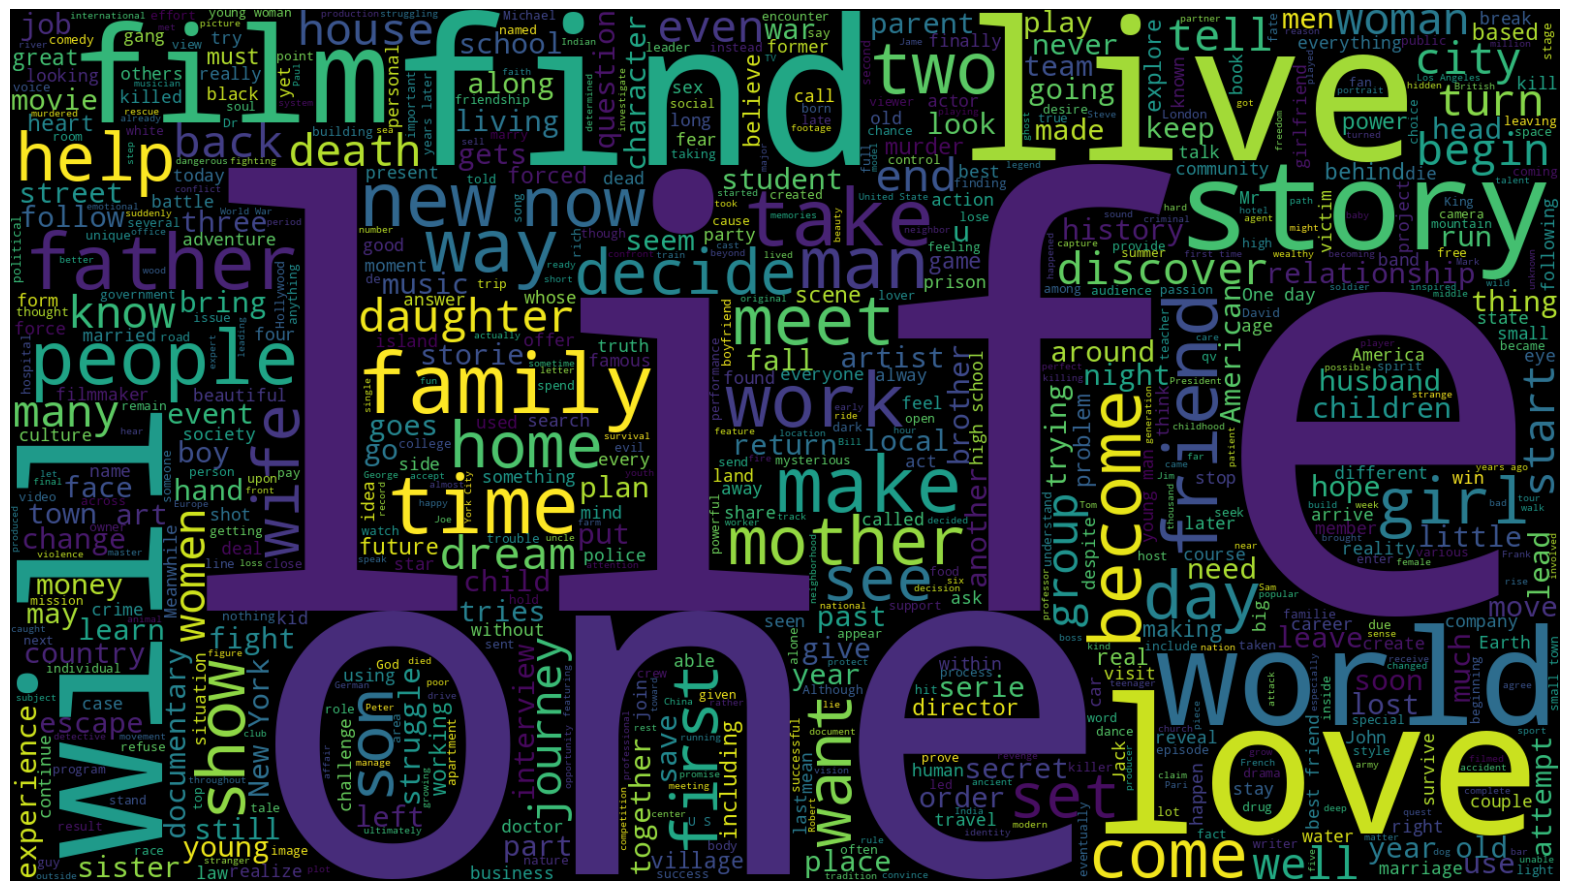

In [ ]:
from wordcloud import WordCloud

text = ' '.join(ts_data['Description'])

plt.figure(figsize = (20,20))
wc = WordCloud(max_words=700, width = 1600, height=900, colormap='viridis').generate(text)
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

**Step 2. Data Cleaning**

---

**Training Data & Testing Data**

In [ ]:
from string import punctuation
import re

def clean_text(text):
  text = re.sub('[^a-zA-Z]', ' ',text)
  text = re.sub(r'@\S+','', text)
  text = re.sub(r'http\S+','', text)
  text = re.sub(r'pic.\S+','', text)
  text = text.lower()
  text = text.split()
  text = [word for word in text if word not in punctuation]
  return ' '.join(text)

tr_data['Description'] = tr_data['Description'].apply(clean_text)
ts_data['Description'] = ts_data['Description'].apply(clean_text)

**Step 3:- Preprocessing**

---

**Training Data & Testing Data**

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

nltk.download('stopwords')
nltk.download('punkt')

ps = PorterStemmer()
tr_corpus = []
ts_corpus = []

def preprocess_text(text):
  tokens = nltk.word_tokenize(text)
  tokens = [ps.stem(word) for word in tokens if word not in stopwords.words('english')]
  return ' '.join(tokens)

tr_corpus = tr_data['Description'].tolist()
ts_corpus = ts_data['Description'].tolist()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


**Phase 2: Feature Engineering**

---
1. Vectorization to model buliding
* TF-IDF
* Word Embedding
---
2. Feature Selection

**Step 1:- Vectorization Algo**

So, here I am using two types of vectorization algorithm and lastly combination of both algorithm to see which is fit for our model

**TF-IDF**

In [ ]:

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=5000) # Initialize the tf-idf
X_train_tfidf = tfidf.fit_transform(tr_corpus).toarray() # fit and transform

#Y_train = tr_data['Genre']

**Word2Vec**

In [ ]:
from gensim.models import Word2Vec
import numpy as np

token = [x.split() for x in tr_corpus]

w2v_model = Word2Vec(sentences=token, vector_size=100, window=5, min_count=1)

def get_avg_w2v(tokens, model, vector_size):
  valid_word = [word for word in tokens if word in model.wv.key_to_index]
  if not valid_word:
    return np.zeros(vector_size)
  return np.mean([model.wv[word] for word in valid_word], axis=0)

X_train_w2v = np.array([get_avg_w2v(tokens, w2v_model, 100) for tokens in token])

**Combine the vectorization algo**

In [ ]:
from scipy.sparse import hstack, csr_matrix

X_train_w2v_sparse = csr_matrix(X_train_w2v)
X_train_comb = hstack([X_train_tfidf, X_train_w2v_sparse])

print(X_train_comb.shape)

(54214, 5100)


**Step 2:- Feature Selection**

we have to select one them to bulid our model

In [ ]:
X = X_train_tfidf
# X = X_train_w2v
# X = X_train_comb
Y = tr_data['Genre']

**Phase 3: Model Building**

---
1. Model Selection and Training
2. Model Evaluation

**Step 1:- Model Selection and Training**

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

def cross_validation(model, X, Y, cv=5):
  scores = cross_val_score(model, X, Y, cv=cv, scoring='accuracy')
  print(f"cross-val scores for {model.__class__.__name__}: {scores}")
  print(f"Mean cross-validation accuracy for {model.__class__.__name__}: {scores.mean()}")

# Intialize and train the model

#Navie Bayes
nb_model = MultinomialNB()
cross_validation(nb_model, X, Y)

# Logistic Regression
lr_model = LogisticRegression(max_iter = 1000)
cross_validation(lr_model, X, Y)

#SVM
svm_model = SVC(kernel='linear')
cross_validation(svm_model, X, Y)

# Spliting the training data into training and validation set
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, random_state=42)

nb_model.fit(X_train, Y_train)
lr_model.fit(X_train, Y_train)
svm_model.fit(X_train, Y_train)

cross-val scores for MultinomialNB: [0.50880753 0.50733192 0.51351102 0.50917643 0.50682531]
Mean cross-validation accuracy for MultinomialNB: 0.5091304403819789
cross-val scores for LogisticRegression: [0.58258784 0.58756802 0.58535461 0.58102001 0.59057369]
Mean cross-validation accuracy for LogisticRegression: 0.585420835076914


**Step 2:- Model Evaluation**

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Naive Bayes
nb_pred = nb_model.predict(X_val)
print("Naive Bayes Accuracy:", accuracy_score(Y_val, nb_pred))
print(classification_report(Y_val, nb_pred))

# Logistic Regression
lr_pred = lr_model.predict(X_val)
print("Logistic Regression Accuracy:", accuracy_score(Y_val, lr_pred))
print(classification_report(Y_val, lr_pred))

# SVM
svm_pred = svm_model.predict(X_val)
print("SVM Accuracy:", accuracy_score(Y_val, svm_pred))
print(classification_report(Y_val, svm_pred))

**Phase 4: Model Improvement and final predictions**

---
1. Hyperparameter tuning
2. Prepare testing dataset and predictions

**Hyperparameter tuning**

In [ ]:
# Example for Logistic Regression with GridSearchCV
param_grid = {'C': [0.1, 1, 10, 100]}
grid_search = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=4, scoring='accuracy')
grid_search.fit(X_train, Y_train)
print("Best parameters for Logistic Regression:", grid_search.best_params_)

**Step 2:- Prepare Testing Dataset and Predictions**

In [ ]:
# Use the best model to predict genres for the testing dataset
best_model = lr_model  # Assuming Logistic Regression performed the best
test_predictions = best_model.predict(tfidf.transform(ts_corpus).toarray())

# Save the predictions
ts_data['predicted_genre'] = test_predictions
ts_data.to_csv('test_predictions.csv', index=False)

from google.colab import files
files.download('test_predictions.csv')